In [69]:
# Required libreries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Data set
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#Checking the data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### check for NaN's

In [4]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
 data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Adding Age columns to data 

In [6]:
# from the given data set Rings / integer / -- / +1.5 gives the age in years.
data['Age']=data['Rings']+1.5


In [7]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


### Lets us check for correlation 

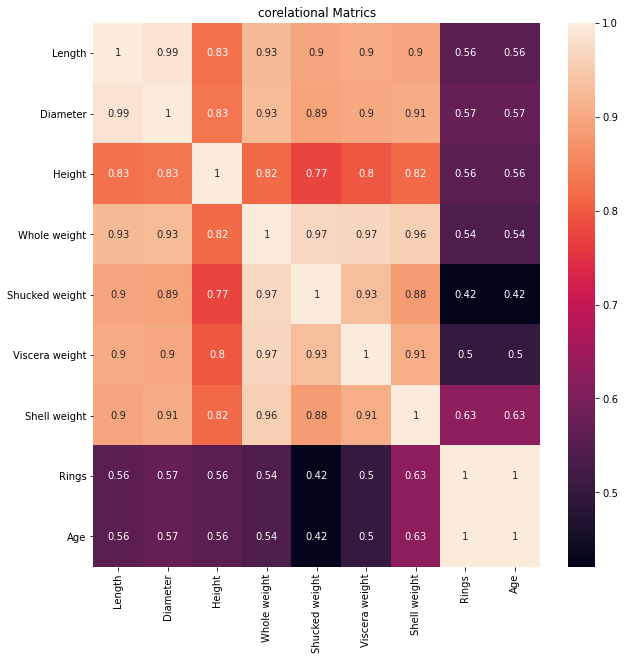

In [8]:
#representing with heatmap
correlation = data.corr()
plt.figure(figsize=[10,10])
sns.heatmap(correlation,annot=True)
plt.title("corelational Matrics")
plt.show()

#### From heat map we can observe that Rings has strong relationship with shellweight and Diameter

#### check for skewness and outlier of the data

<AxesSubplot:xlabel='Length', ylabel='Density'>

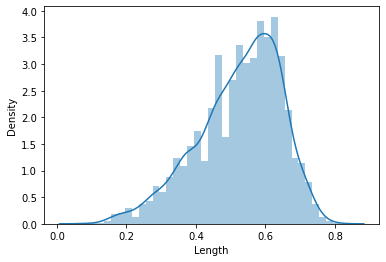

In [9]:
#visualizing the skewness of the data

sns.distplot(data['Length'])



<AxesSubplot:xlabel='Diameter', ylabel='Density'>

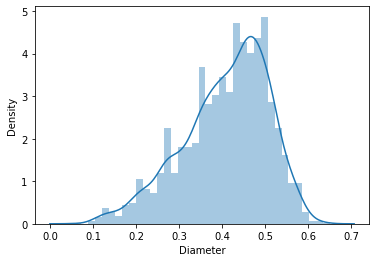

In [10]:
sns.distplot(data['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

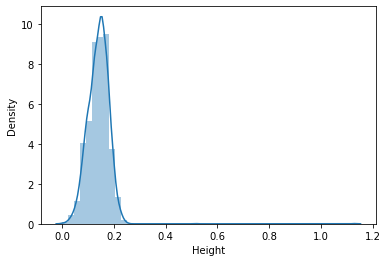

In [11]:
sns.distplot(data['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

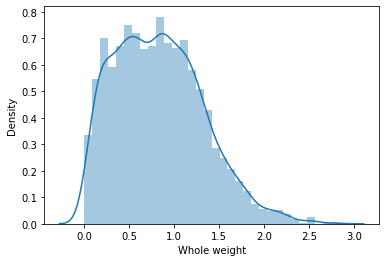

In [12]:
sns.distplot(data['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

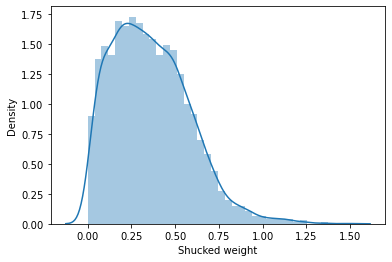

In [13]:
sns.distplot(data['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

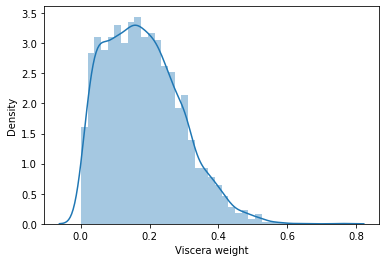

In [14]:
sns.distplot(data['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

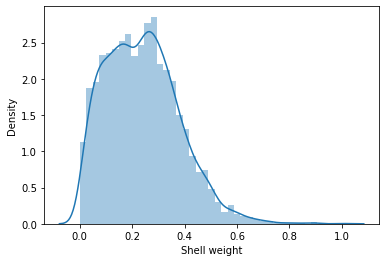

In [15]:
sns.distplot(data['Shell weight'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

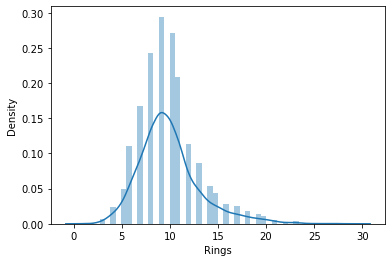

In [16]:
sns.distplot(data['Rings'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

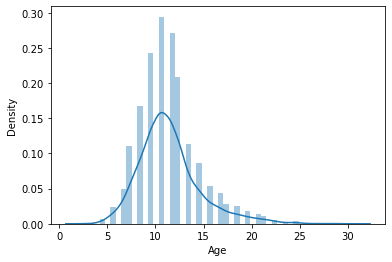

In [17]:
sns.distplot(data['Age'])

In [18]:
#before appling transformation method we need to seperate the numerical and categorical data
numeric_feature = data.drop(columns='Sex')
catagorical_feature =data['Sex']

In [19]:
numeric_feature

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [20]:
catagorical_feature

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [21]:
numeric_feature.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

In [22]:
#we found all variable has skewness.need to deal with it.

from sklearn.preprocessing import power_transform
num = power_transform(numeric_feature)

numeric_feature = pd.DataFrame(num,columns=numeric_feature.columns)

numeric_feature


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,1.482358,1.483125
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135,-0.953949
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075,-0.174681
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,0.156908,0.160476
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,-0.949135,-0.953949
...,...,...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,0.462368,0.467196
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,0.156908,0.160476
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,-0.176075,-0.174681
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,0.156908,0.160476


In [23]:
numeric_feature.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Rings             0.004429
Age              -0.006715
dtype: float64

#### skew removed,check for outliers 

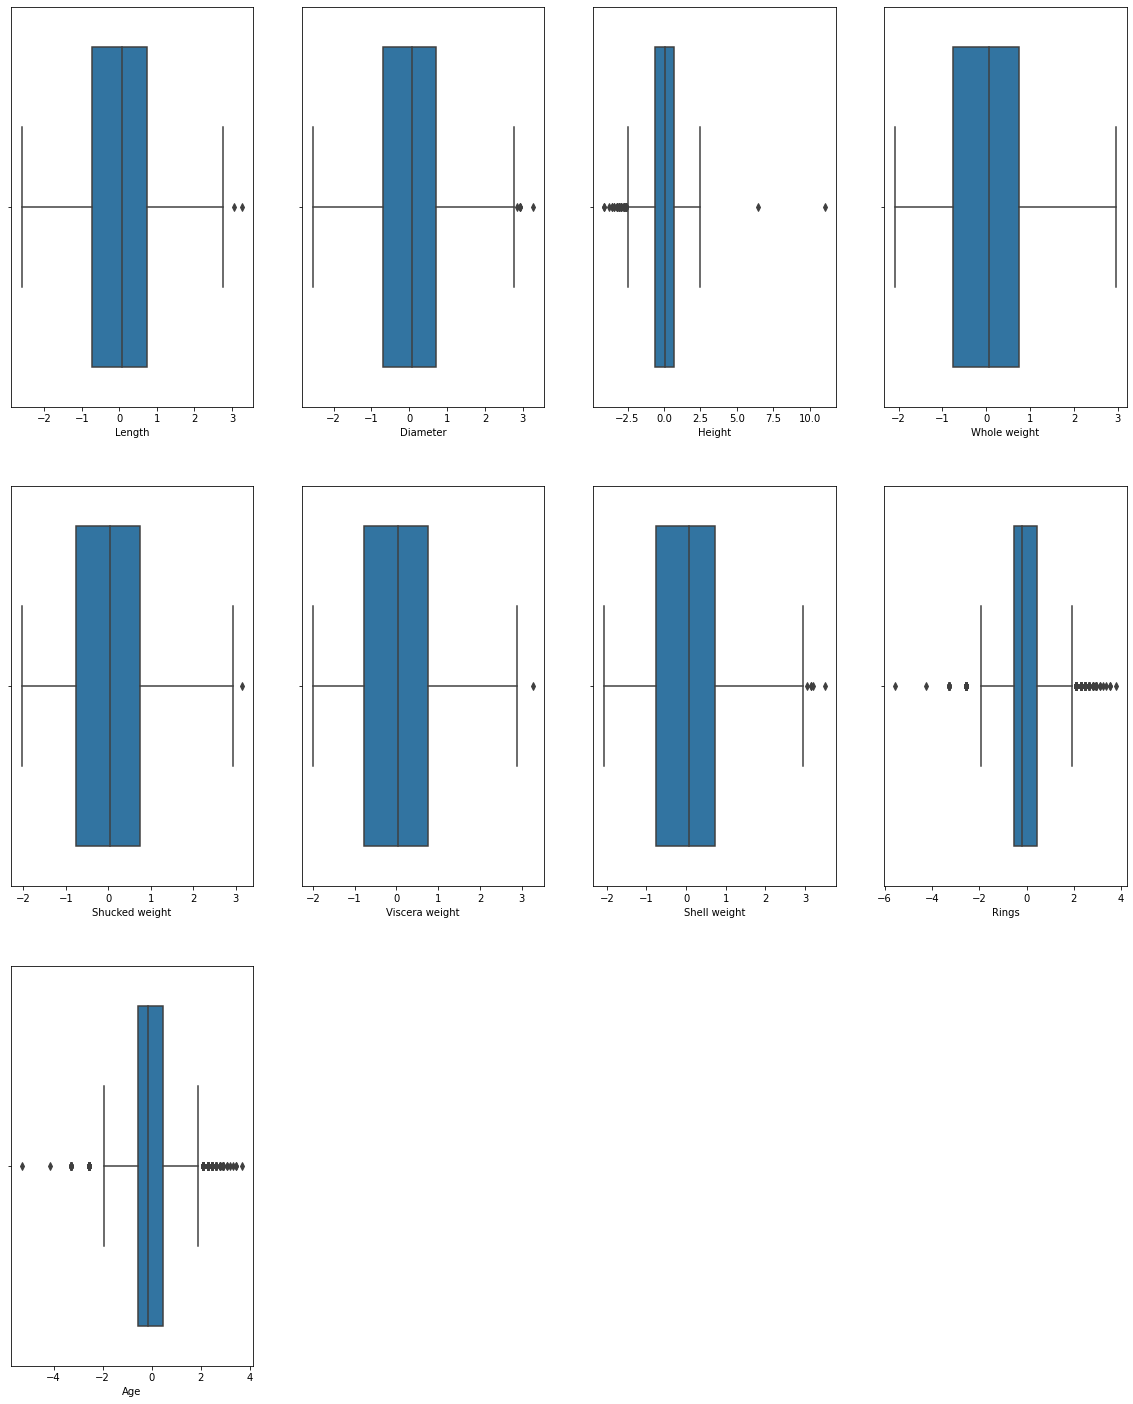

In [24]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in numeric_feature:
    if plotnumber<=9:
        ax= plt.subplot(3,4,plotnumber)
        sns.boxplot(numeric_feature[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.show()

In [25]:
#removing outliers

from scipy.stats import zscore

z = np.abs(zscore(numeric_feature))
filtering_entry = (z<3).all(axis=1)
numeric_feature = numeric_feature[filtering_entry]
print(numeric_feature)
np.where(z>3)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0    -0.685502 -0.549860 -1.124512     -0.576766       -0.540989   
1    -1.396344 -1.387333 -1.264396     -1.351761       -1.311662   
2    -0.070774  0.008537 -0.064823     -0.198099       -0.366116   
3    -0.797286 -0.549860 -0.320227     -0.571893       -0.591672   
4    -1.513796 -1.459659 -1.549424     -1.413146       -1.380201   
...        ...       ...       ...           ...             ...   
4172  0.249836  0.345636  0.666117      0.241948        0.194158   
4173  0.492813  0.230611 -0.064823      0.395706        0.495450   
4174  0.593366  0.645191  1.565082      0.777944        0.838137   
4175  0.853375  0.769928  0.307083      0.633874        0.858739   
4176  1.834478  1.726289  1.347943      1.937323        2.103648   

      Viscera weight  Shell weight     Rings       Age  
0          -0.693283     -0.587809  1.482358  1.483125  
1          -1.332953     -1.332420 -0.949135 -0.953949  
2          -

(array([ 163,  166,  236,  236,  236,  237,  237,  237,  238,  238,  238,
         294,  294,  306,  306,  306,  480,  480,  520,  520,  526,  526,
         694,  719,  719,  719,  720,  720,  720,  891,  894,  894, 1054,
        1054, 1174, 1209, 1257, 1417, 1428, 1428, 1429, 1429, 1763, 1987,
        2051, 2108, 2108, 2108, 2115, 2115, 2161, 2169, 2171, 2172, 2201,
        2201, 2209, 2209, 2334, 2371, 2371, 2381, 2711, 2711, 2711, 3149,
        3149, 3190, 3280, 3280, 3472, 3472, 3521, 3521, 3801, 3801, 3902,
        3996], dtype=int64),
 array([6, 6, 2, 7, 8, 2, 7, 8, 2, 7, 8, 7, 8, 2, 7, 8, 7, 8, 7, 8, 7, 8,
        2, 2, 7, 8, 2, 7, 8, 6, 7, 8, 7, 8, 2, 4, 2, 2, 0, 1, 7, 8, 5, 2,
        2, 6, 7, 8, 7, 8, 6, 2, 2, 2, 7, 8, 7, 8, 0, 7, 8, 2, 2, 7, 8, 7,
        8, 2, 7, 8, 7, 8, 7, 8, 7, 8, 2, 2], dtype=int64))

In [27]:
#percentage of data removed

percentage = (((4177-4132)/ 4177) * 100)
percentage

1.0773282259995212

<AxesSubplot:xlabel='Sex', ylabel='count'>

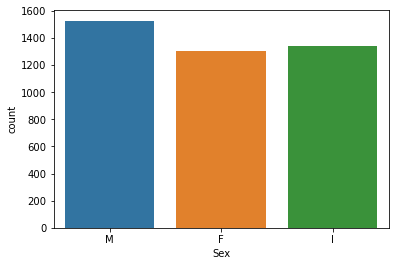

In [29]:
#visualize the sex and age of the abalone
sns.countplot(x='Sex',data=data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

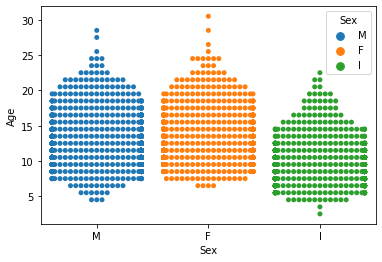

In [34]:
#let us compare with sex and age
sns.swarmplot(x='Sex',y='Age',data =data,hue ='Sex')

### Male : age majority lies in between 7.5 years to 19 years,Female: age majority lies in between 8 years to 19 years,Immature: age majority lies in between 6 years to < 10 years 

In [37]:
#Modeling the Data.Let split the data set 
x = data.drop('Age', axis = 1)
y = data['Age']

In [38]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])
x['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [45]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.20522124,
        -1.21298732, -0.91001299],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.97541324,
         0.49695471, -0.28962385],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [54]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [64]:
models = {'linear_regression':LinearRegression(),
         
         'lasso':Lasso(random_state=1),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1)
         
         }

In [67]:
#hyper parameter tunning
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Lasso
lasso_params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}


In [71]:
params = [lr_params, lasso_params, dt_params, rf_params]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(x_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()


linear_regression
Best params : {'fit_intercept': True}
RMSE : 1.4876210103831199e-15

lasso
Best params : {'alpha': 0.0001}
RMSE : 3.111035280238158e-05

decision_tree
Best params : {'min_samples_split': 5, 'max_leaf_nodes': 256, 'max_features': 0.8, 'max_depth': 20}
RMSE : 0.24955576129643112

random_forest
Best params : {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
RMSE : 0.09971840012176812



In [73]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, n_estimators=200,
                      random_state=1)

In [79]:
#saving the model in pickle format
import joblib
joblib.dump(rf_params,"abalone.pkl")

['abalone.pkl']